## NLP model (PRELIM)
Trying to predict funding from word tokenization
### Conclusions
- about half of the unique words in titles/essays are not in `nltk` word corpus. But checking all is far to slow (about 10 words per second). This may decrease with more refinement of the regular expression parsing
- using either title or essay achieves >70% validation accuracy in logistic regression. Could tinker with hyperparameter tuning, but wasn't promising enough

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from src.data import process_nlp_data, load_nlp_data, load_count_vectorizer
from src.model import fit_nlp_model, load_nlp_model
from src.visualization import plot_learning_curve

In [3]:
%%time
process_nlp_data()

Reducing levels from 52 to 30
Reducing levels from 8833 to 11
Reducing levels from 27 to 17
Wall time: 58.7 s


In [4]:
X_train, X_test, y_train, y_test = load_nlp_data()

In [5]:
X_train.shape

(487997, 40745)

In [6]:
%%time
fit_nlp_model()

Wall time: 6.76 s


c:\users\zrankin\appdata\local\continuum\miniconda3\envs\kaggle\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
model = load_nlp_model()

In [8]:
(y_test == model.predict(X_test)).mean()

0.6932741435631125

Wall time: 45.6 s


<module 'matplotlib.pyplot' from 'c:\\users\\zrankin\\appdata\\local\\continuum\\miniconda3\\envs\\kaggle\\lib\\site-packages\\matplotlib\\pyplot.py'>

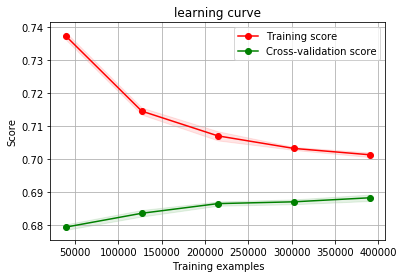

In [9]:
%%time
plot_learning_curve(model, 'learning curve', X_train, y_train, cv=5)

In [10]:
cv = load_count_vectorizer()

In [11]:
%%time
from nltk.corpus import words
# check proportion of words that aren't in word corpus
def is_a_word(w):
    return w in words.words()

features = cv.get_feature_names()
is_word = [is_a_word(w) for w in np.random.choice(features, 100)]

Wall time: 11.2 s


In [12]:
np.array(is_word).mean()

0.34

In [13]:
# make a data frame, which includes feature names
# Note - due to size, only get a subset of the data
df_test = pd.DataFrame(X_test[:100].toarray(), columns=cv.get_feature_names()) #, columns=cv.get_feature_names()

In [14]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), model.coef_[0]
    )
}

print('Most positively associated words')
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:10]:
    print (best_positive)
    
print('\n Most negatively associated words')
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:10]:
    print (best_negative)

Most positively associated words
('sandy', 3.998661142597977)
('knitting', 3.074201640633087)
('sims', 2.4122996185149024)
('refugees', 2.2388388142271873)
('chemists', 2.1857622587423626)
('compost', 2.0615204199472243)
('flashcards', 2.0276581164493908)
('disneys', 1.9883090364541416)
('composting', 1.85433456715602)
('reeds', 1.8474494975479065)

 Most negatively associated words
('alphasmarts', -1.8481679041671366)
('dlp', -1.662534788979086)
('midi', -1.6341556410100684)
('smartmusic', -1.5893185901461975)
('cpr', -1.5607675260699443)
('palettes', -1.5387605213548596)
('pods', -1.5117673749184541)
('glimpse', -1.5088486516551165)
('nc', -1.4857369583293578)
('decorate', -1.4736424392041496)
